<a href="https://colab.research.google.com/github/Hemant493/Books-Machine-Learning-and-data-Science/blob/main/XFE5ASZLTH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Fraud Detection EDA & Preprocessing Notebook

submission_code = "XFE5ASZLTH"




In [ ]:
# Cell 2 - Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE



In [ ]:
# Cell 3 - Load Dataset
df = pd.read_excel("/Fraud Detection Dataset.xlsx")
df.columns = df.columns.str.strip()



In [ ]:
# Cell 4 - Descriptive Statistics
descriptive_stats = df.describe(include='all')
descriptive_stats



,Customer_name,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Target
count,51000,51000.000000,48480.000000,51000,48448.000000,48527,48453,51000.000000,51000.000000,51000.000000,48531,51000.000000
unique,51000,NaN,NaN,5,NaN,4,8,NaN,NaN,NaN,5,NaN
top,Ow9Nk7Ka1Mp3Qx4E,NaN,NaN,Bill Payment,NaN,Desktop,chennai,NaN,NaN,NaN,UPI,NaN
freq,1,NaN,NaN,10340,NaN,15795,6149,NaN,NaN,NaN,11887,NaN
mean,NaN,3005.110176,2996.249784,NaN,11.488400,NaN,NaN,1.995725,60.033902,7.495588,NaN,0.049216
std,NaN,1153.121107,5043.932555,NaN,6.922954,NaN,NaN,1.415150,34.384131,4.020080,NaN,0.216320
min,NaN,1000.000000,5.030000,NaN,0.000000,NaN,NaN,0.000000,1.000000,1.000000,NaN,0.000000
25%,NaN,2007.000000,1270.552500,NaN,5.000000,NaN,NaN,1.000000,30.000000,4.000000,NaN,0.000000
50%,NaN,2996.000000,2524.100000,NaN,12.000000,NaN,NaN,2.000000,60.000000,7.000000,NaN,0.000000
75%,NaN,4006.000000,3787.240000,NaN,17.000000,NaN,NaN,3.000000,90.000000,11.000000,NaN,0.000000


In [ ]:
# Cell 5 - Missing Value Analysis
missing_data = df.isnull().sum()
missing_data[missing_data > 0]



,0
Transaction_Amount,2520
Time_of_Transaction,2552
Device_Used,2473
Location,2547
Payment_Method,2469


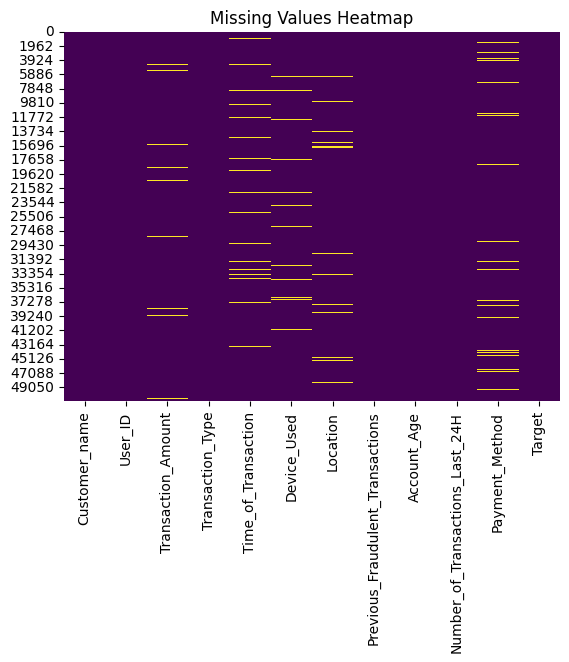

In [ ]:
# Cell 6 - Visualize Missing Data
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()



In [ ]:
# Cell 7 - Fill Missing Values
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])



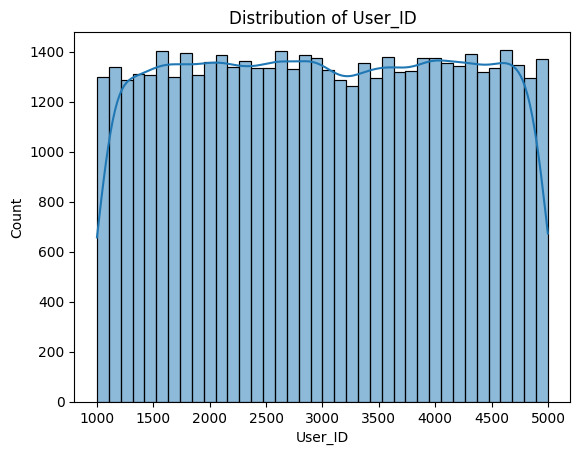

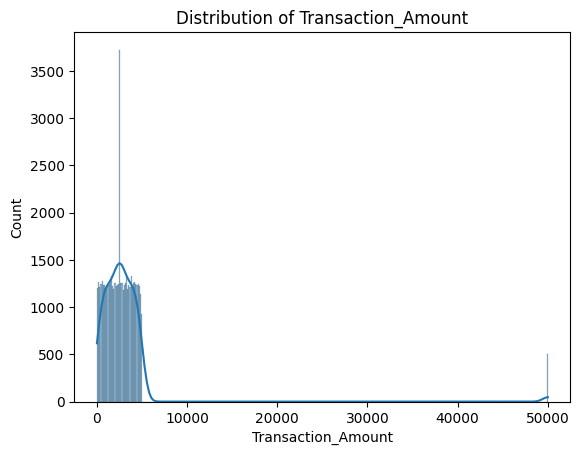

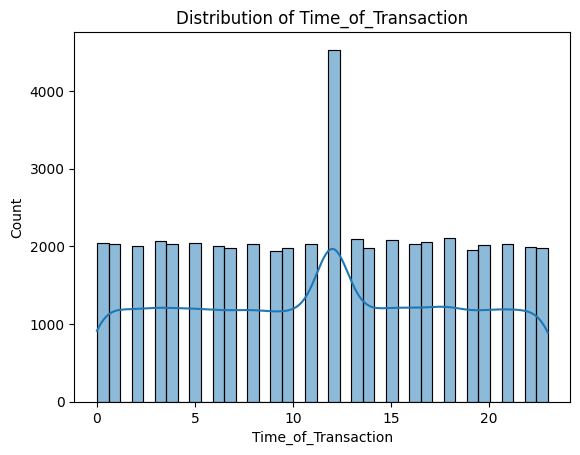

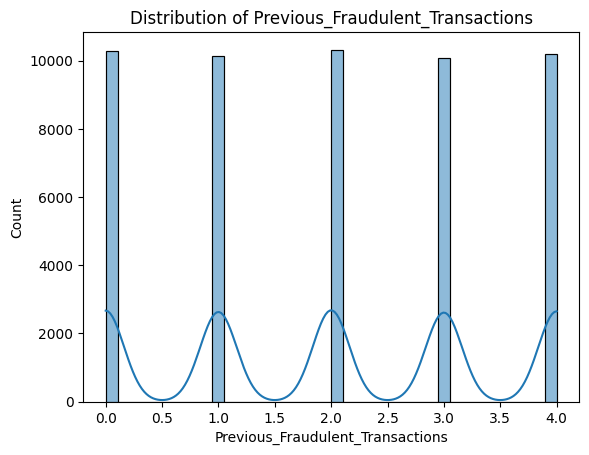

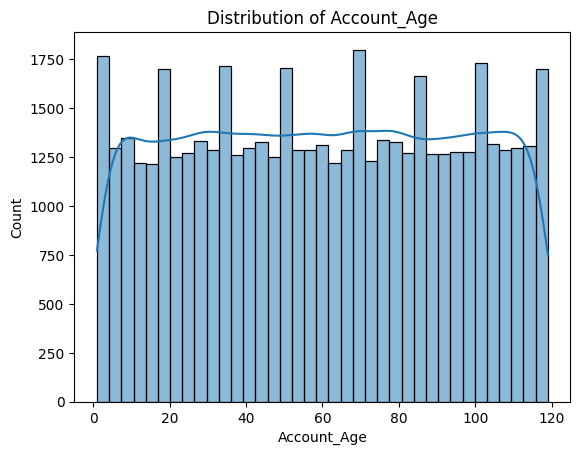

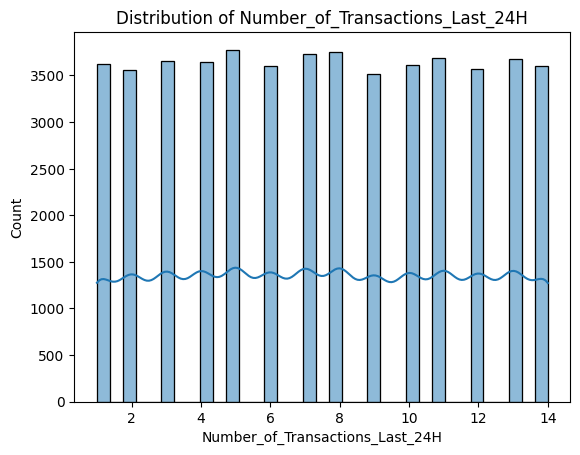

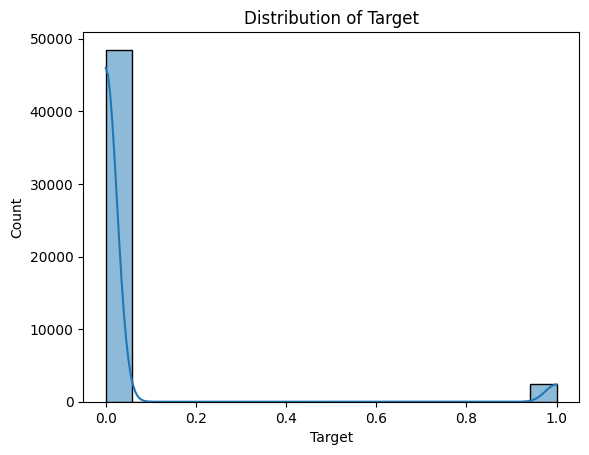

In [ ]:
# Cell 8 - KDE Plots (Overall)
for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()



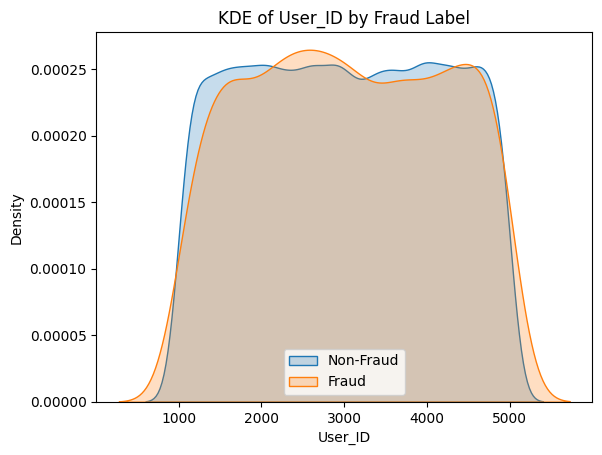

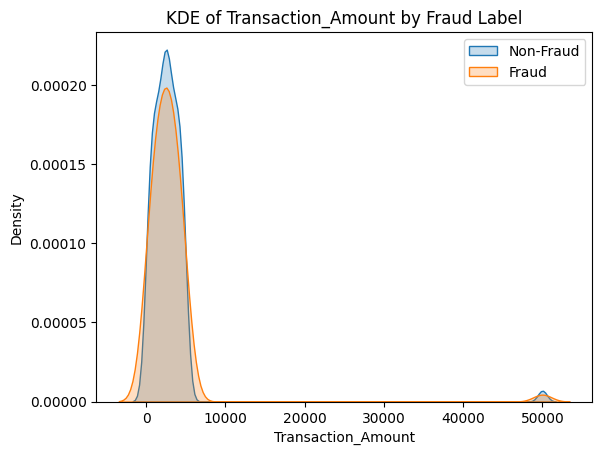

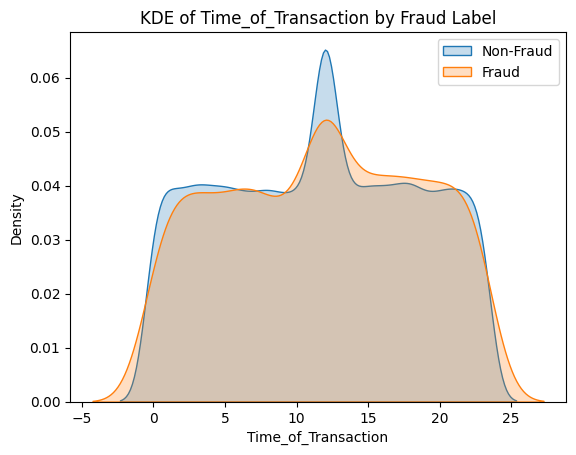

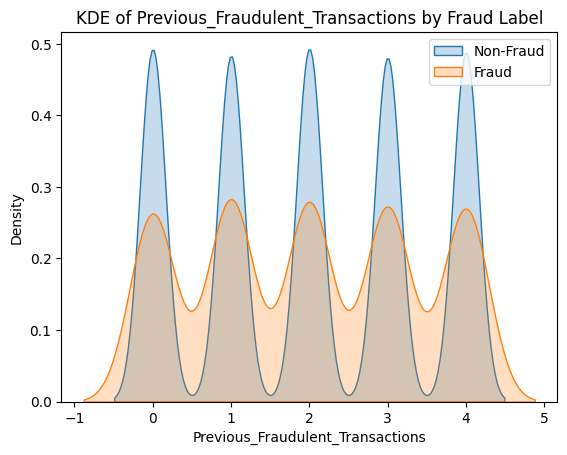

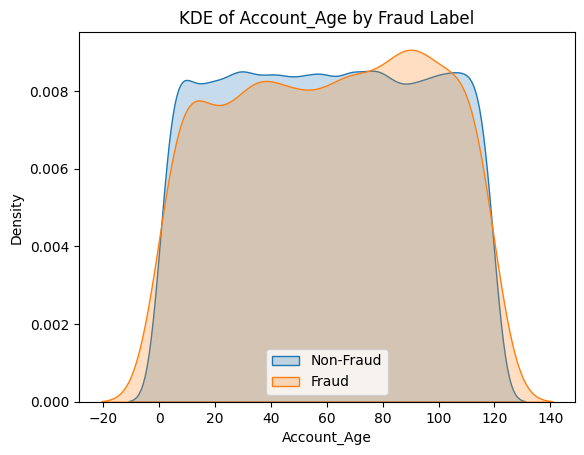

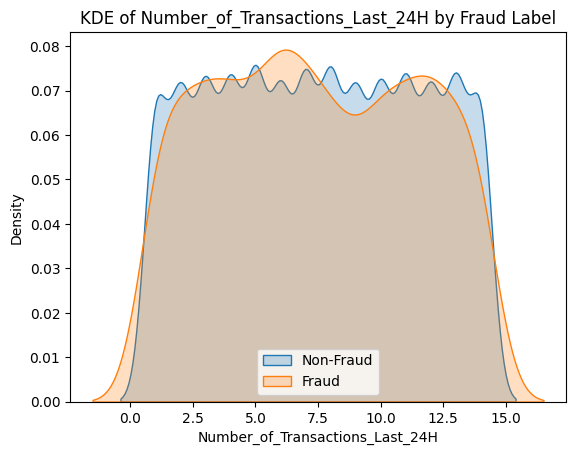

<ipython-input-12-229036a99189>:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[df['Target']==0][col], label='Non-Fraud', fill=True)
<ipython-input-12-229036a99189>:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[df['Target']==1][col], label='Fraud', fill=True)
<ipython-input-12-229036a99189>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


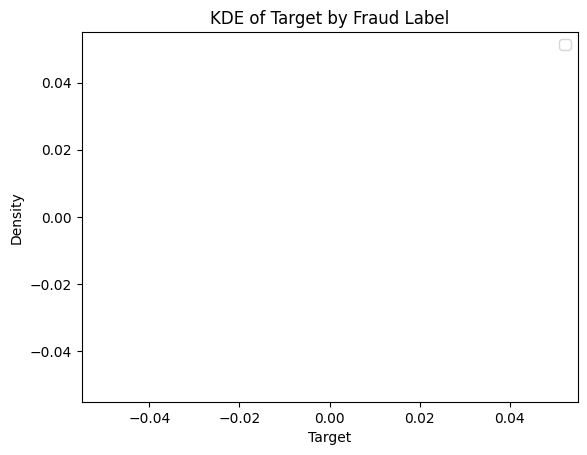

In [ ]:
# Cell 9 - KDE by Fraud Label
for col in num_cols:
    plt.figure()
    sns.kdeplot(df[df['Target']==0][col], label='Non-Fraud', fill=True)
    sns.kdeplot(df[df['Target']==1][col], label='Fraud', fill=True)
    plt.title(f"KDE of {col} by Fraud Label")
    plt.legend()
    plt.show()



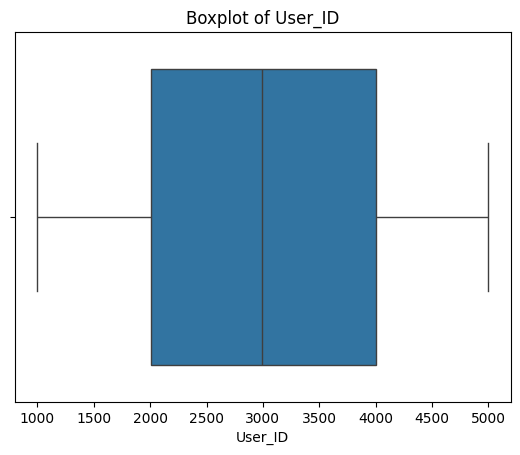

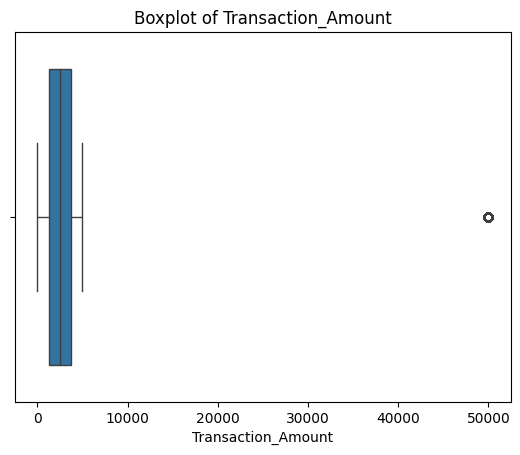

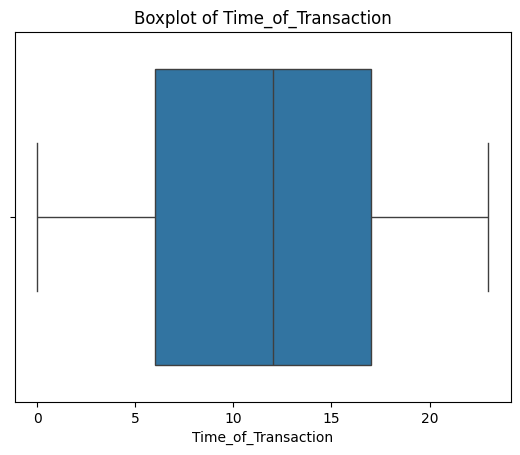

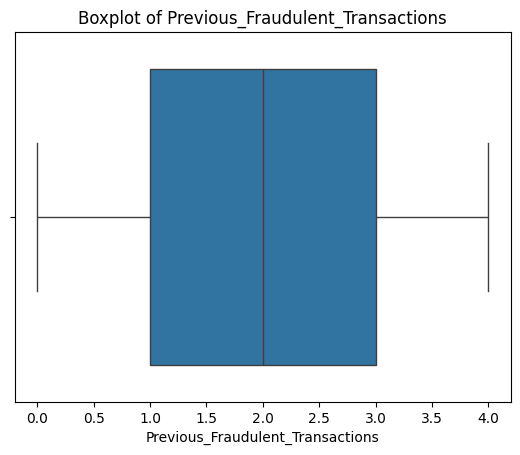

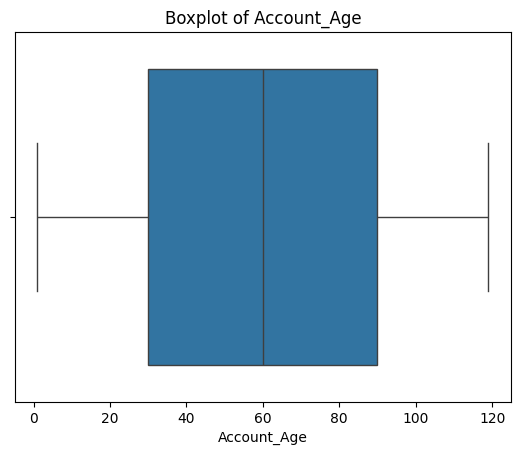

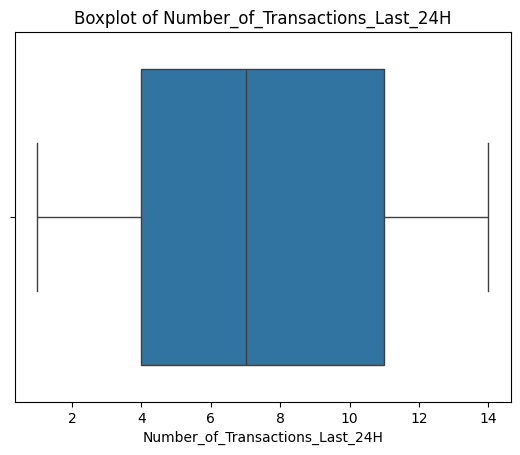

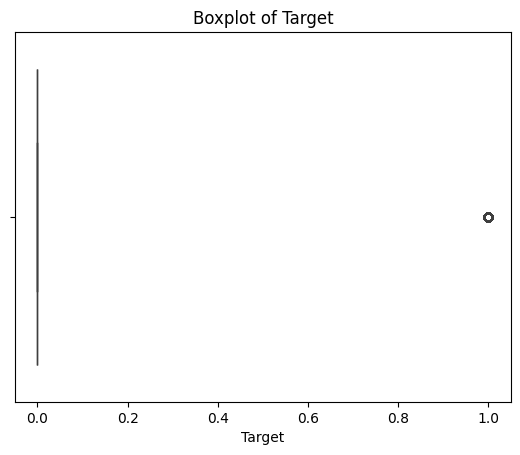

In [ ]:
# Cell 10 - Box Plots of Numerical Features
for col in num_cols:
    plt.figure()
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot of {col}")
    plt.show()



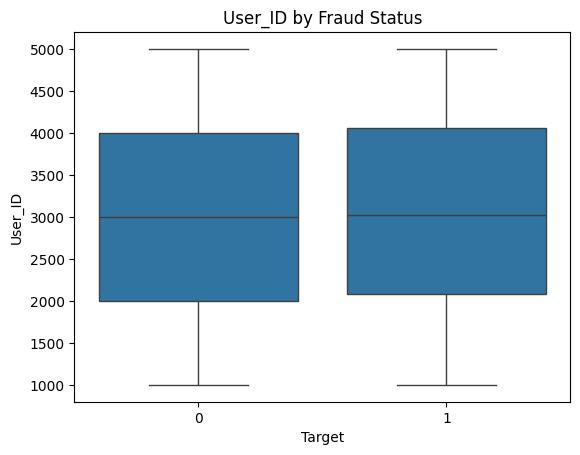

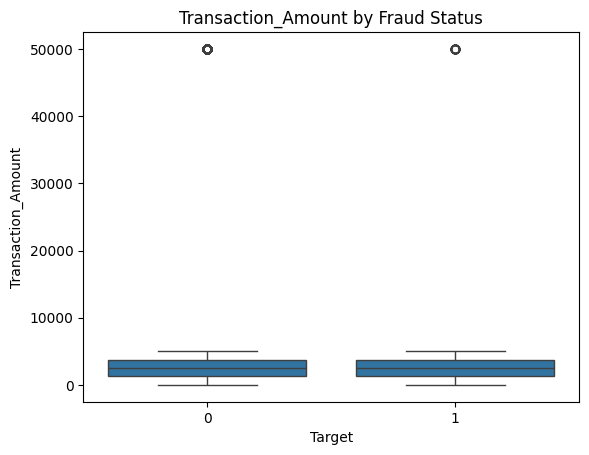

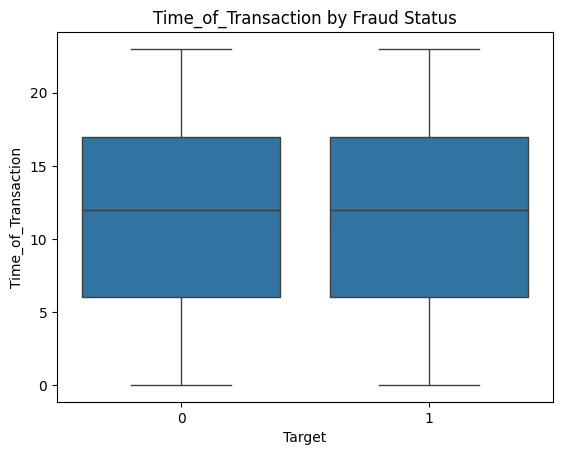

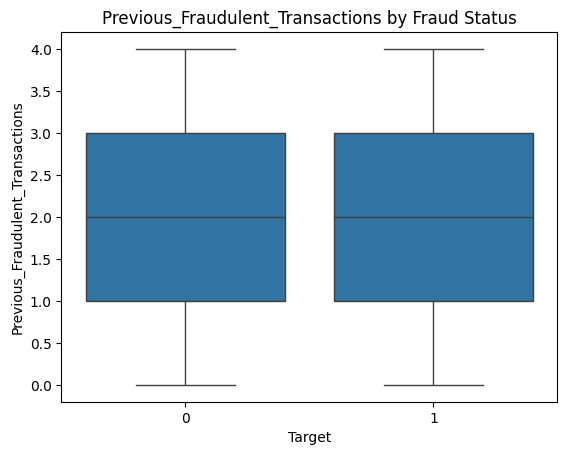

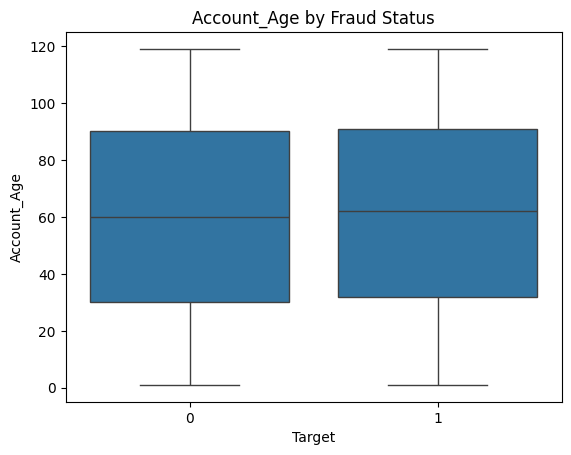

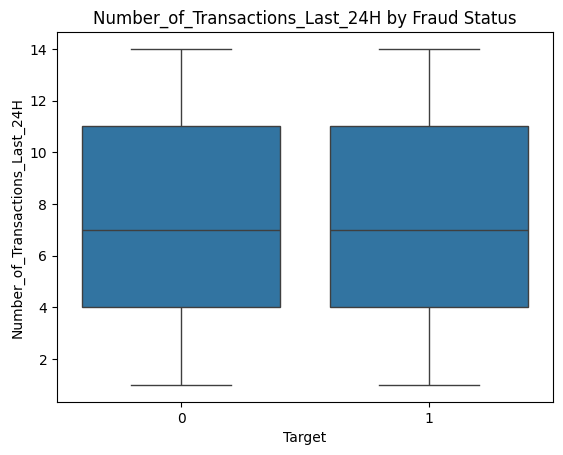

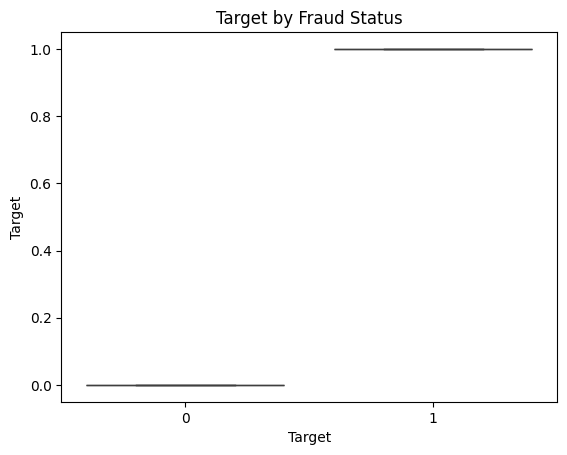

In [ ]:
# Cell 11 - Fraud Highlighted Boxplots
for col in num_cols:
    plt.figure()
    sns.boxplot(x='Target', y=col, data=df)
    plt.title(f"{col} by Fraud Status")
    plt.show()



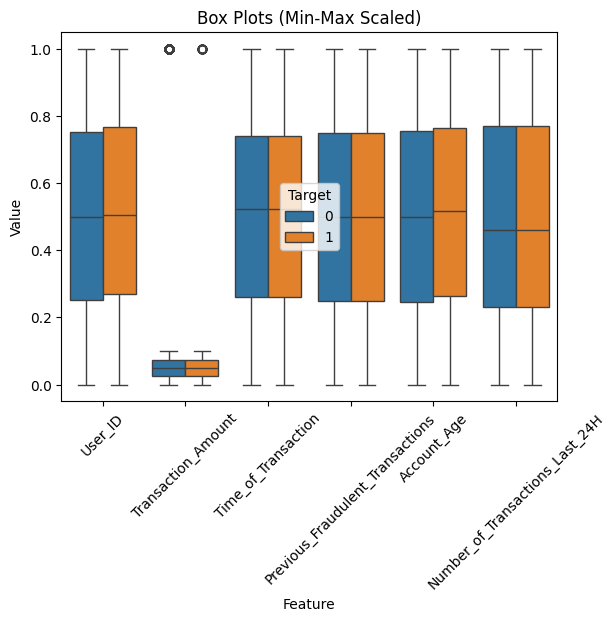

In [ ]:
# Cell 12 - Common Scale Box Plots
minmax_scaled = pd.DataFrame(MinMaxScaler().fit_transform(df[num_cols]), columns=num_cols)
minmax_scaled['Target'] = df['Target']
melted = pd.melt(minmax_scaled, id_vars='Target', var_name='Feature', value_name='Value')
sns.boxplot(data=melted, x='Feature', y='Value', hue='Target')
plt.title("Box Plots (Min-Max Scaled)")
plt.xticks(rotation=45)
plt.show()



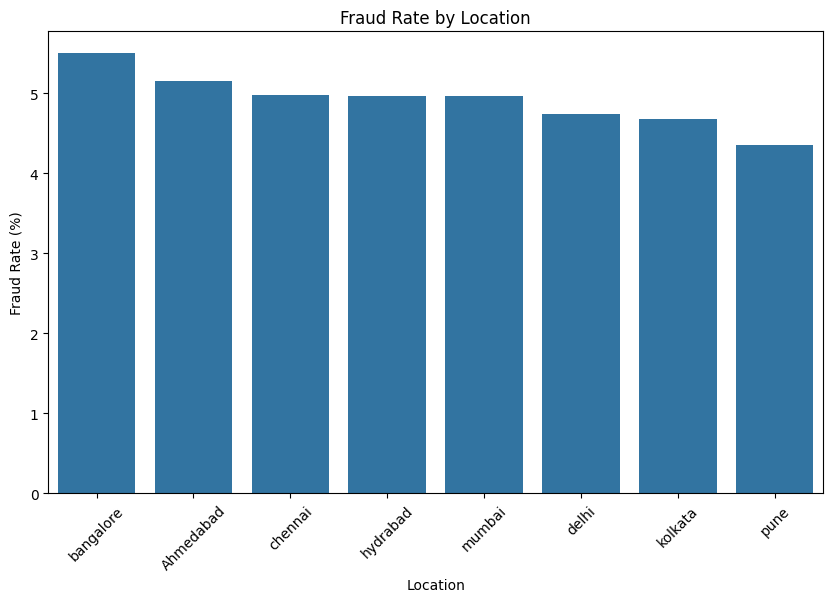

In [ ]:
# Cell 13 - Fraud Rate by Location
fraud_rate = df.groupby('Location')['Target'].agg(['count', 'sum'])
fraud_rate['Fraud_Rate'] = (fraud_rate['sum'] / fraud_rate['count']) * 100
fraud_rate = fraud_rate.sort_values('Fraud_Rate', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_rate.index, y=fraud_rate['Fraud_Rate'])
plt.title("Fraud Rate by Location")
plt.xticks(rotation=45)
plt.ylabel("Fraud Rate (%)")
plt.show()

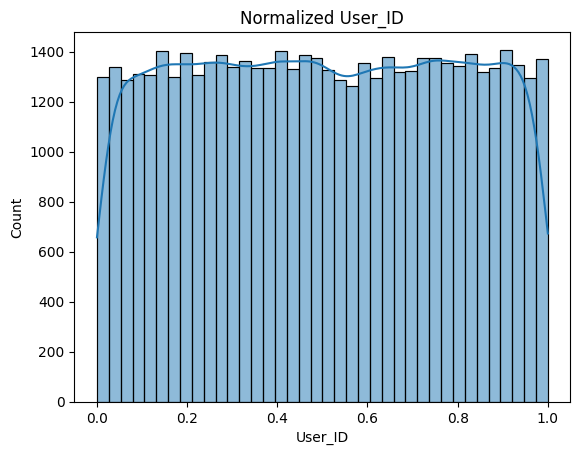

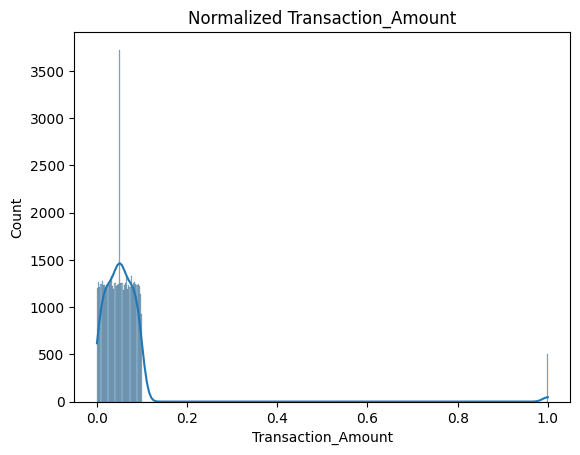

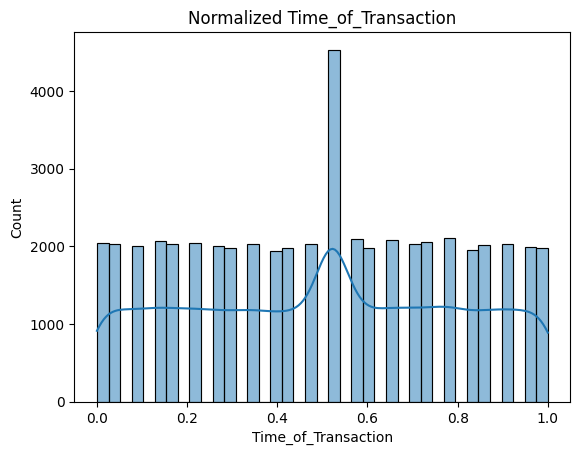

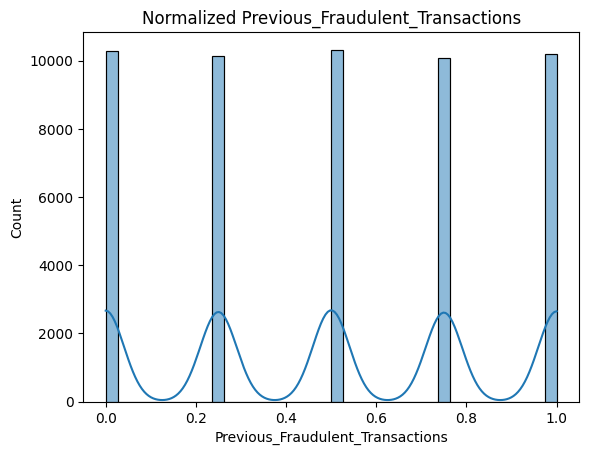

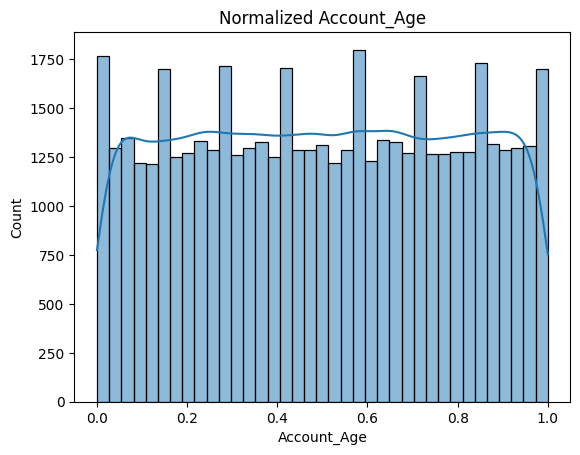

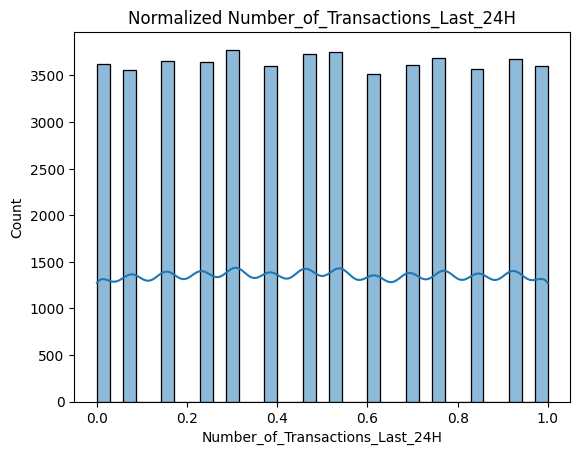

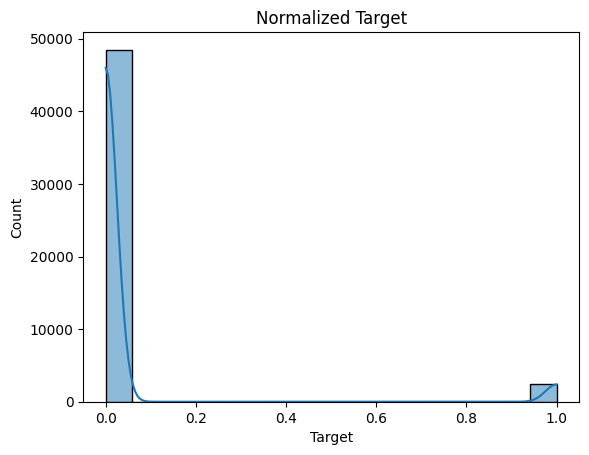

In [ ]:
# Cell 14 - Normalization
normalized = pd.DataFrame(MinMaxScaler().fit_transform(df[num_cols]), columns=num_cols)
for col in num_cols:
    plt.figure()
    sns.histplot(normalized[col], kde=True)
    plt.title(f"Normalized {col}")
    plt.show()

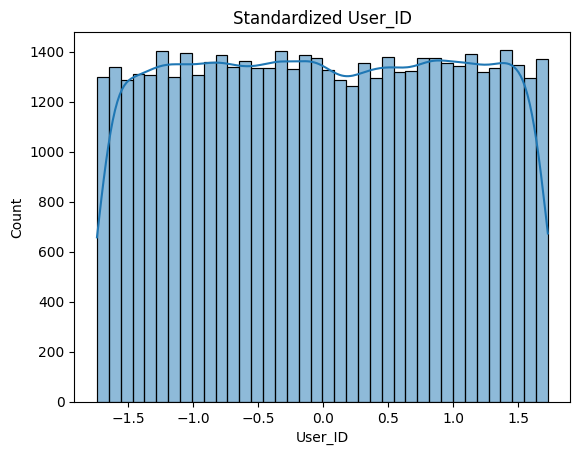

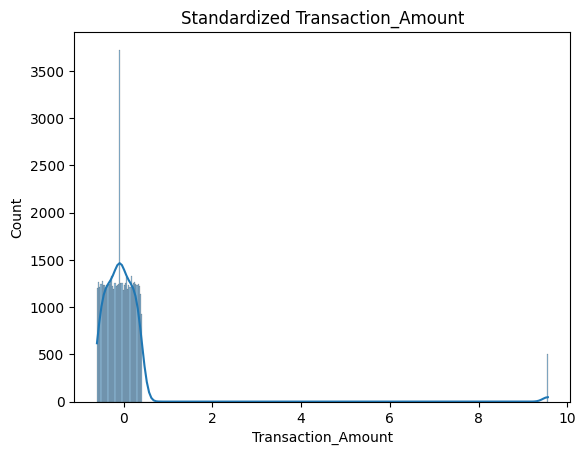

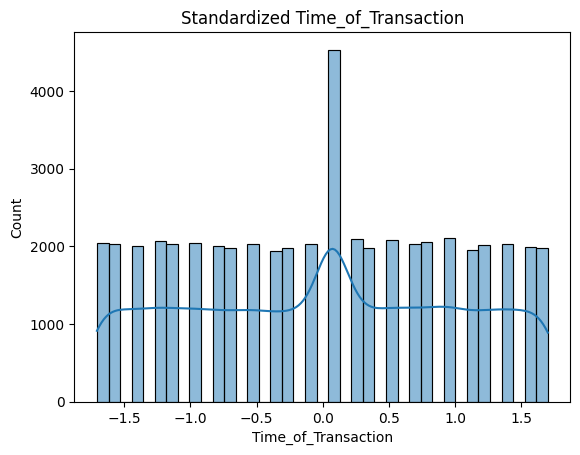

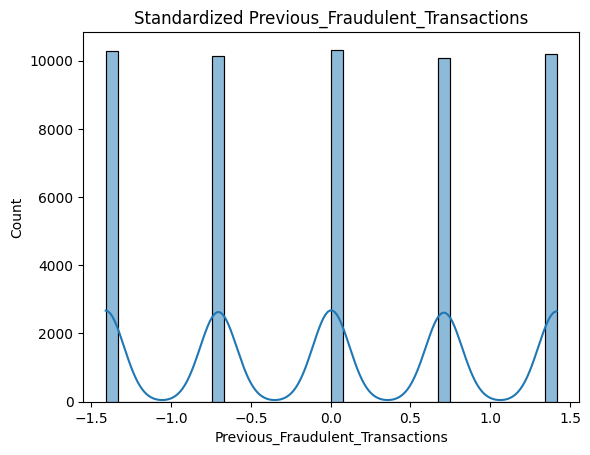

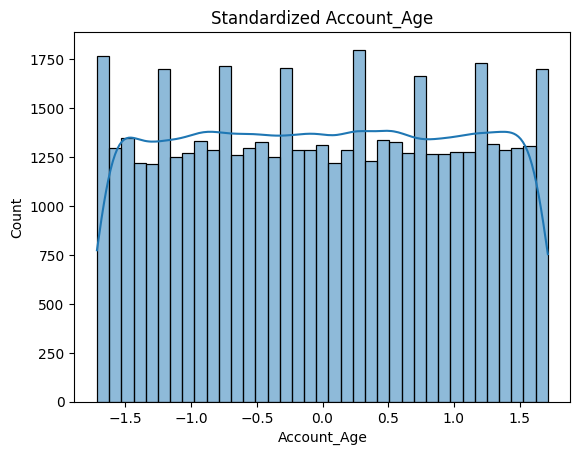

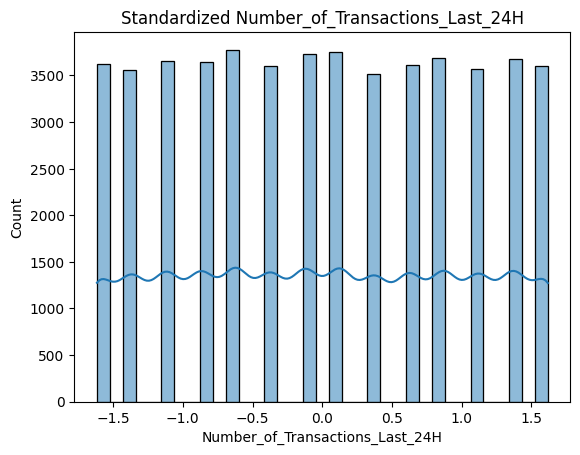

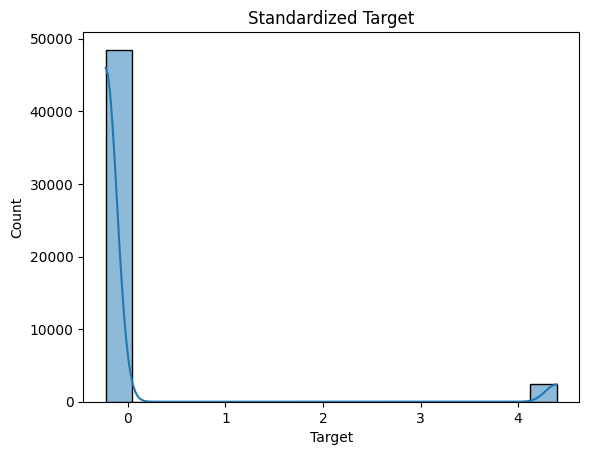

In [ ]:
# Cell 15 - Standardization
standardized = pd.DataFrame(StandardScaler().fit_transform(df[num_cols]), columns=num_cols)
for col in num_cols:
    plt.figure()
    sns.histplot(standardized[col], kde=True)
    plt.title(f"Standardized {col}")
    plt.show()

In [ ]:
# Cell 16 - Preprocessing Summary
preprocessing_notes = """
- Missing values filled (median/mode).
- Log transformation recommended for skewed features.
- StandardScaler preferred due to model interpretability.
- Outliers kept (fraud signal).
- Location and time show strong fraud correlation.
"""
print(preprocessing_notes)


- Missing values filled (median/mode).
- Log transformation recommended for skewed features.
- StandardScaler preferred due to model interpretability.
- Outliers kept (fraud signal).
- Location and time show strong fraud correlation.



In [ ]:
# Cell 17 - Preprocessing for Modeling
X = df.drop(['Customer_name', 'Target'], axis=1)
X = pd.get_dummies(X, drop_first=True)
y = df['Target']

# Address class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [ ]:
# Cell 18 - Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Results:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Results:
[[14536    47]
 [  835 13676]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     14583
           1       1.00      0.94      0.97     14511

    accuracy                           0.97     29094
   macro avg       0.97      0.97      0.97     29094
weighted avg       0.97      0.97      0.97     29094



In [ ]:
# Cell 19 - Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("\nLogistic Regression Results:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Results:
[[13714   869]
 [ 2231 12280]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     14583
           1       0.93      0.85      0.89     14511

    accuracy                           0.89     29094
   macro avg       0.90      0.89      0.89     29094
weighted avg       0.90      0.89      0.89     29094



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
